In [1]:
#Import library 
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#Import Data
gold_data = pd.read_csv(r"D:\Visual Studio Code\ML\DataSet\gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold_data.shape

(2290, 6)

In [6]:
#Basic info of data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
corr = gold_data.drop(columns="Date",axis=1).corr()

<Axes: >

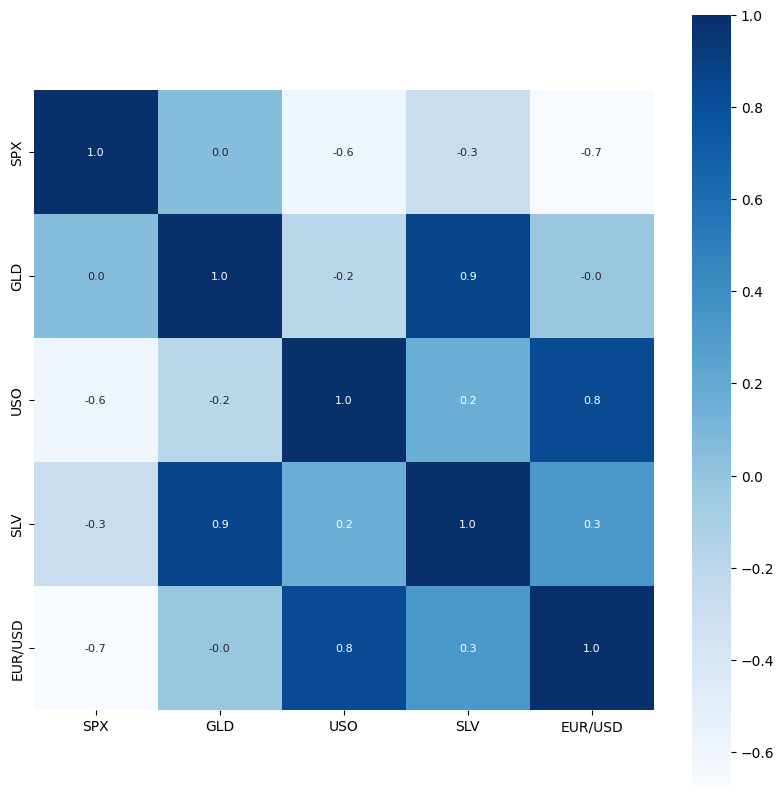

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="Blues",square=True,cbar =True,annot=True,annot_kws={'size':8},fmt='.1f')

In [10]:
#Correlation value of Gold
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3672\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

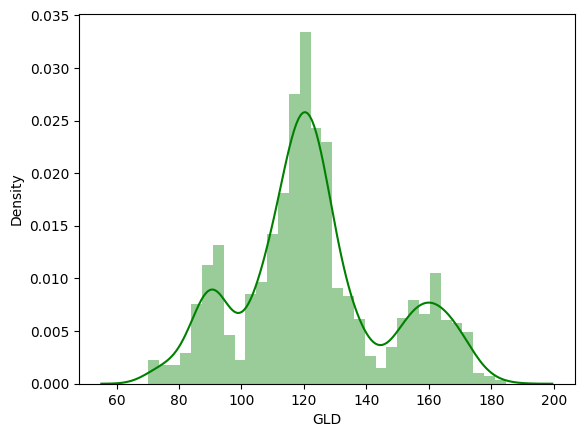

In [11]:
sns.distplot(gold_data['GLD'],color='green')

In [12]:
#Spliting the data into label and unlabel dataset
x = gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [13]:
#Spliting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [14]:
model = RandomForestRegressor(n_estimators=100)

In [15]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
#Model Evaluation
#Preiction on test data
test_data_pred = model.predict(x_test)


In [17]:
#Finding error 
error_in_model  = r2_score(y_test,test_data_pred)
print(error_in_model)

0.9897067309844036


In [18]:
y_Test = list(y_test)

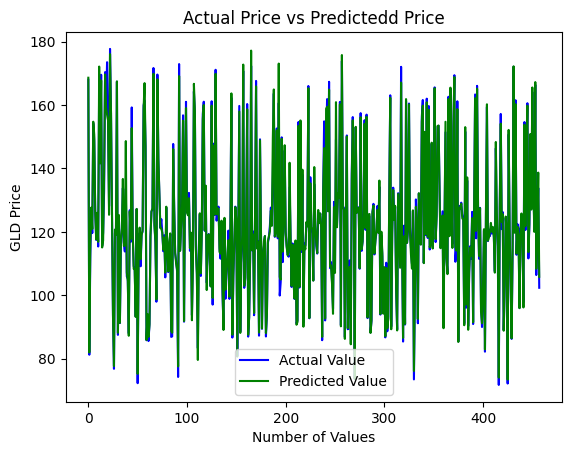

In [19]:
plt.plot(y_Test,color ='blue',label ='Actual Value')
plt.plot(test_data_pred,color ='green',label='Predicted Value')
plt.title('Actual Price vs Predictedd Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()